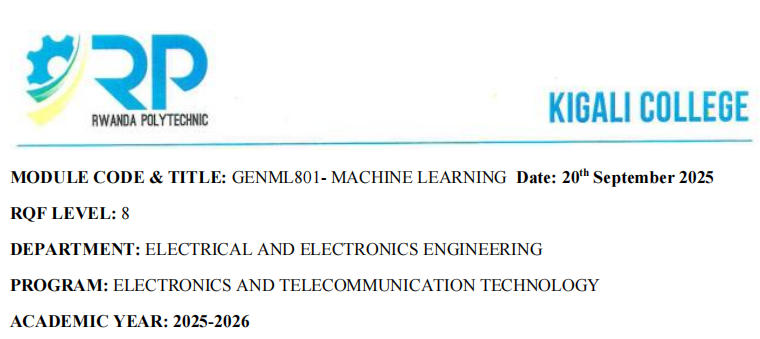

## PROJECT TITLE: EARLY DETECTION OF STUDENT DROPOUT

##### Deliverables: dataset, EDA, feature engineering, model, deployment notes

#### Author: Emery MUNEZERO
#### Reg.Number: 25RP20376
#### Date: 23/09/2025


## 1. Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## 2. Load Dataset

In [17]:
# Load the synthetic dataset (replace with real if you have one)
df = pd.read_csv("C:/Users/iamem/Downloads/Early_Detection_of_Student_Dropout_Project/student_dropout_synthetic.csv")

# Preview
df.head()


,gender,age,study_time,failures,absences,G1,G2,G3,family_support,paid_classes,activities,internet,parental_edu,dropout
0,M,19,3,1,3,9,6,3,no,no,yes,no,secondary,1
1,F,18,3,2,7,9,10,6,no,no,no,yes,none,1
2,F,21,2,0,4,9,6,7,no,yes,yes,no,primary,0
3,F,19,3,0,3,12,9,9,yes,no,no,yes,higher,0
4,M,17,1,1,5,11,14,11,yes,no,no,yes,higher,0


## 3.Dataset Description

In [18]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

df.describe(include="all")


Shape: (1200, 14)

Columns: ['gender', 'age', 'study_time', 'failures', 'absences', 'G1', 'G2', 'G3', 'family_support', 'paid_classes', 'activities', 'internet', 'parental_edu', 'dropout']

Missing values per column:
gender            0
age               0
study_time        0
failures          0
absences          0
G1                0
G2                0
G3                0
family_support    0
paid_classes      0
activities        0
internet          0
parental_edu      0
dropout           0
dtype: int64


,gender,age,study_time,failures,absences,G1,G2,G3,family_support,paid_classes,activities,internet,parental_edu,dropout
count,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200,1200,1200,1200.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,4,NaN
top,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,no,no,yes,secondary,NaN
freq,661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,831,900,694,689,599,NaN
mean,NaN,18.035000,2.213333,0.418333,3.936667,10.540833,10.543333,8.342500,NaN,NaN,NaN,NaN,NaN,0.216667
std,NaN,1.990916,0.914797,0.772762,1.874545,2.990114,3.623175,3.219808,NaN,NaN,NaN,NaN,NaN,0.412145
min,NaN,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,16.000000,2.000000,0.000000,3.000000,9.000000,8.000000,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,18.000000,2.000000,0.000000,4.000000,11.000000,11.000000,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,20.000000,3.000000,1.000000,5.000000,13.000000,13.000000,11.000000,NaN,NaN,NaN,NaN,NaN,0.000000


## 4.Exploratory Data Analysis (EDA)

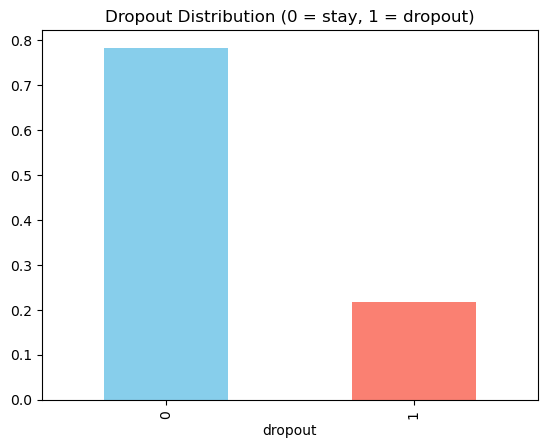

In [19]:
df['dropout'].value_counts(normalize=True).plot(kind="bar", color=["skyblue","salmon"])
plt.title("Dropout Distribution (0 = stay, 1 = dropout)")
plt.show()


### Numeric distributions

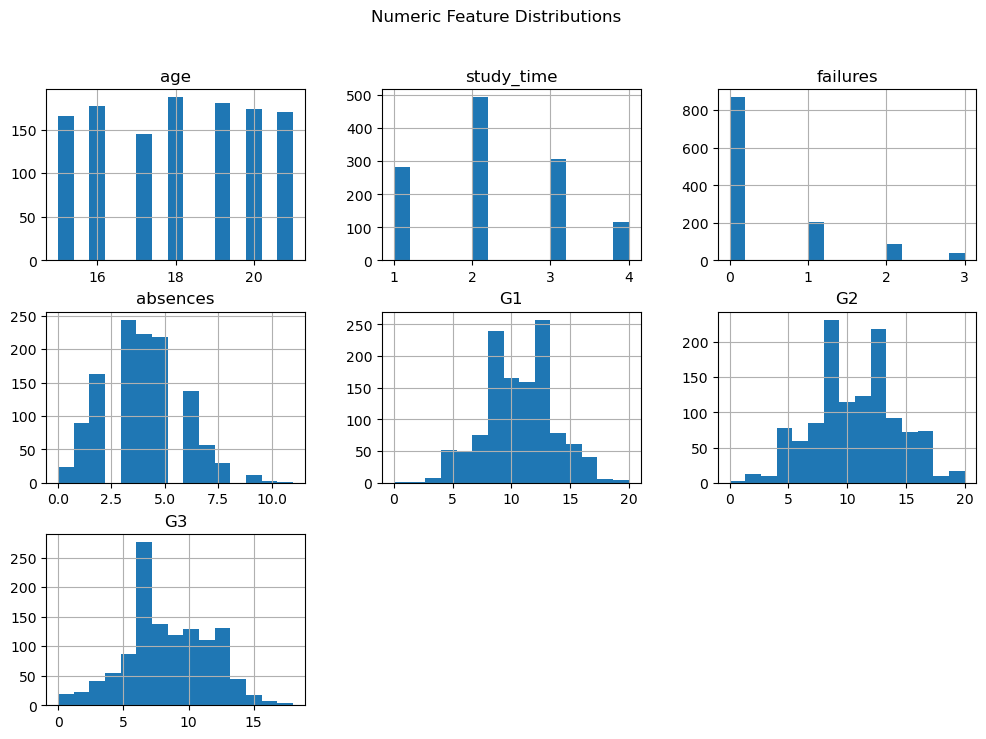

In [20]:
num_cols = ['age','study_time','failures','absences','G1','G2','G3']
df[num_cols].hist(bins=15, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()


### Correlation heatmap

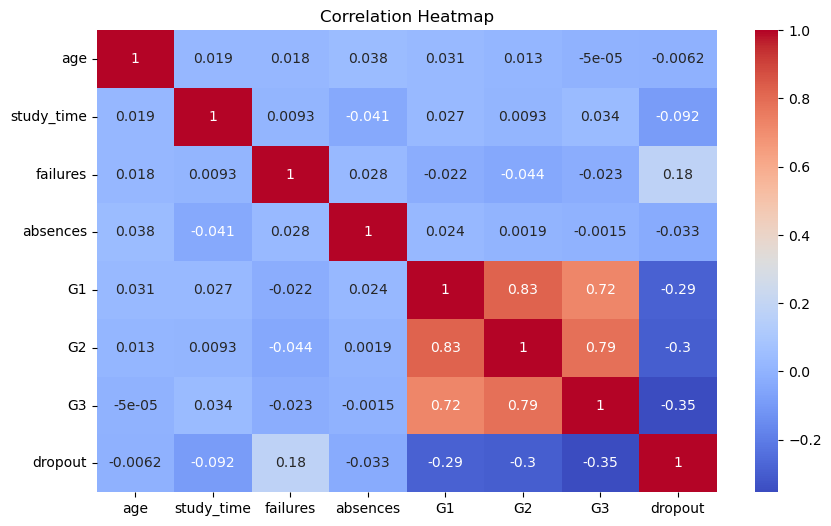

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols+['dropout']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Boxplot of Grades vs Dropout

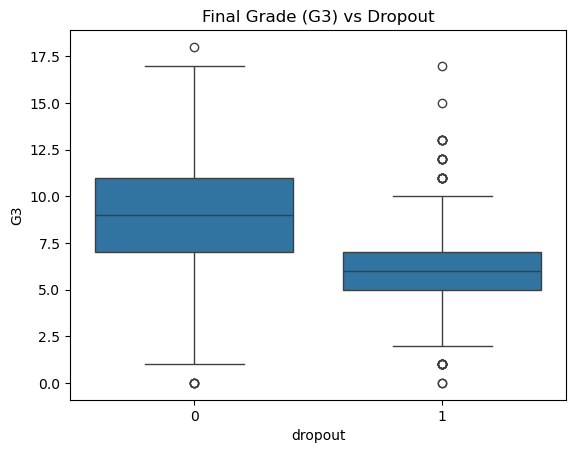

In [22]:
sns.boxplot(x="dropout", y="G3", data=df)
plt.title("Final Grade (G3) vs Dropout")
plt.show()


### 5. Feature Engineering

In [23]:
# Copy dataset
df_proc = df.copy()

# One-hot encode categorical variables
df_proc = pd.get_dummies(df_proc, drop_first=True)

print("Processed shape:", df_proc.shape)
df_proc.head()


Processed shape: (1200, 16)


,age,study_time,failures,absences,G1,G2,G3,dropout,gender_M,family_support_yes,paid_classes_yes,activities_yes,internet_yes,parental_edu_none,parental_edu_primary,parental_edu_secondary
0,19,3,1,3,9,6,3,1,True,False,False,True,False,False,False,True
1,18,3,2,7,9,10,6,1,False,False,False,False,True,True,False,False
2,21,2,0,4,9,6,7,0,False,False,True,True,False,False,True,False
3,19,3,0,3,12,9,9,0,False,True,False,False,True,False,False,False
4,17,1,1,5,11,14,11,0,True,True,False,False,True,False,False,False


### 6.Train/Test Split

In [24]:
X = df_proc.drop("dropout", axis=1)
y = df_proc["dropout"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (960, 15)  Test size: (240, 15)


### 7.Model Building

In [25]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### 8.Model Evaluation

Accuracy: 0.7875

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       188
           1       0.52      0.27      0.35        52

    accuracy                           0.79       240
   macro avg       0.67      0.60      0.61       240
weighted avg       0.76      0.79      0.76       240



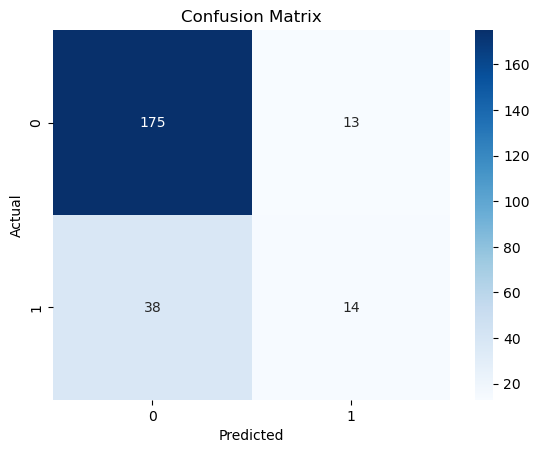

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### 10.Save Model for Deployment

In [27]:
import joblib

joblib.dump(clf, "rf_dropout_model.joblib")
print("Model saved as rf_dropout_model.joblib")


Model saved as rf_dropout_model.joblib


### 11.Deployment Notes

In [28]:
pip install streamlit scikit-learn pandas joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
